In [1]:
import pandas as pd
from utils import *
from data_preprocess import *
from feature_normal_transform import *

The following notebook demonstrates the usage Intel Tabular Toolkit. The problem we are trying to solve here is prediction of ICU admission of a patient who is affected by Covid. The dataset can be downloaded from Kaggle 
https://www.kaggle.com/Sírio-Libanes/covid19. It is a time series dataset with missing values

**Load the dataset**

In [2]:
filename = "Covid_19_ICU_prediction.csv"
df_covid_data = pd.read_csv(filename)

**Dataset Exploration**

In [3]:
patient_ID = "PATIENT_VISIT_IDENTIFIER" # Unique ID of patient
label = "ICU" # Prediction label
# Describe Data API gives an overview of class distribution of the dataset
describe_data(df_covid_data, patient_ID, label)

The shape of the Raw input data is:  (1925, 231)

Total number of patients:  385
Total patients affected: 195 
  Total  Patients not affected : 190
Ratio of patients affected vs Non affected patients :  1.0263157894736843
Patients Affected Prevalence as  %Percentage :  50.649350649350644

----------Following Features are present in the data -----------
Index(['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER',
       'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
       'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6',
       ...
       'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF',
       'BLOODPRESSURE_DIASTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
       'HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL',
       'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL', 'WINDOW', 'ICU'],
      dtype='object', length=231)

----------The data types of the Features given below -----------
<class 'pandas.core.frame.DataFrame'>
Rang

(array([  0,   1,   2,  11,  13,  14,  15,  17,  18,  19,  24,  27,  28,
         29,  31,  36,  37,  38,  39,  40,  41,  44,  47,  48,  52,  53,
         54,  55,  62,  63,  64,  67,  68,  69,  70,  73,  77,  78,  79,
         81,  82,  84,  85,  86,  87,  88,  89,  90,  94,  96,  99, 100,
        102, 103, 104, 105, 106, 107, 109, 111, 113, 116, 117, 119, 120,
        124, 125, 132, 133, 136, 137, 138, 139, 140, 141, 142, 144, 145,
        148, 149, 151, 152, 155, 156, 157, 159, 161, 164, 165, 166, 168,
        174, 175, 176, 178, 179, 182, 183, 188, 191, 192, 193, 194, 201,
        202, 203, 206, 207, 209, 212, 213, 214, 215, 217, 218, 219, 220,
        222, 226, 227, 228, 230, 231, 232, 233, 234, 235, 239, 240, 242,
        243, 245, 248, 250, 252, 255, 256, 259, 260, 261, 263, 265, 266,
        267, 270, 275, 278, 281, 282, 285, 286, 287, 288, 289, 291, 292,
        297, 302, 305, 306, 307, 308, 309, 310, 315, 316, 318, 320, 322,
        323, 325, 327, 329, 337, 339, 342, 343, 347

In [4]:
# The time series dataset from medical domain is often sparsely populated, with nan percentage in df API call, we can find out how sparse is the dataset
nan_percentage_in_df(df_covid_data)

dataframe dimension:  (1925, 231)
Total entries:   444675
Total null entries:  223863
Percentage of null entries:  50.34305953786473


50.34305953786473

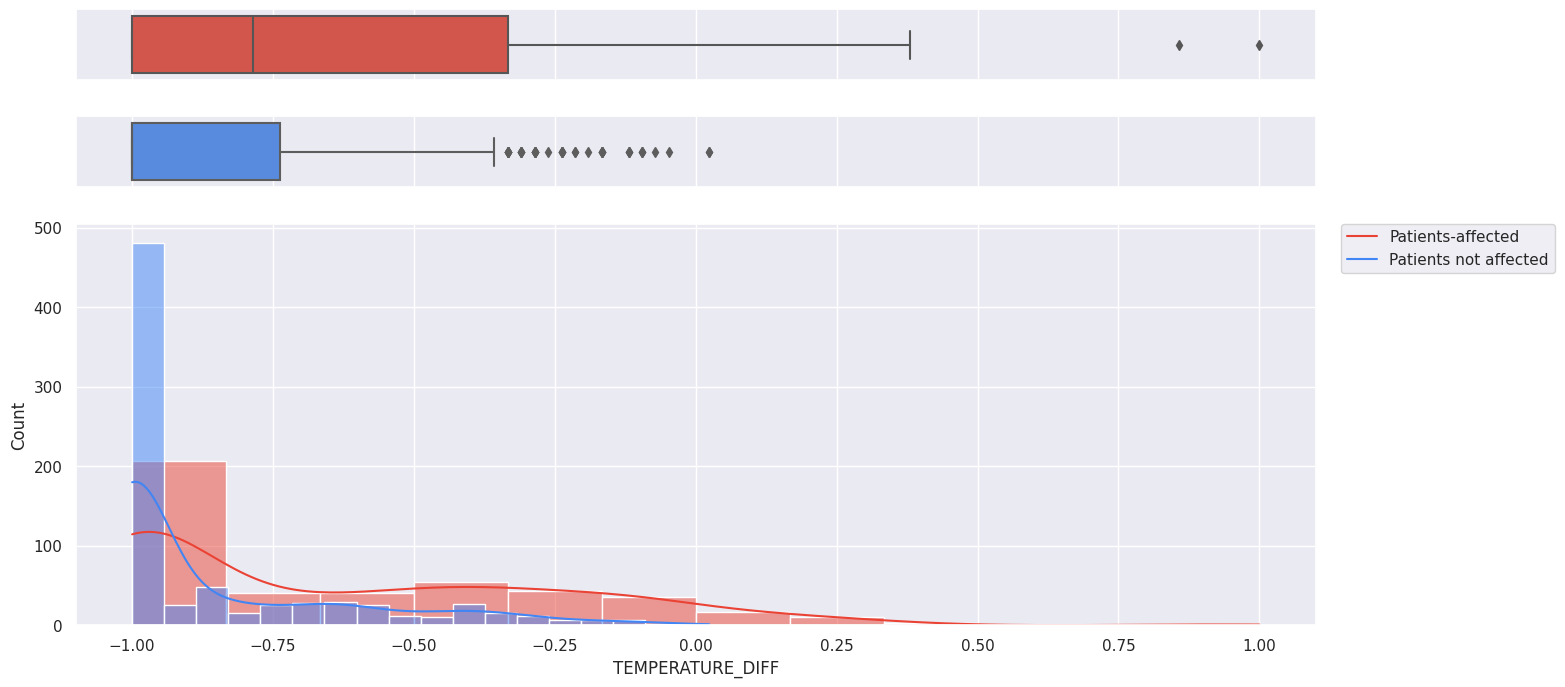

In [5]:
# Detect outliers in the dataset with histogram plot
histogram_boxplot(df_covid_data,"TEMPERATURE_DIFF","ICU")

In [6]:
exclude_columns = ['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER',
       'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
       'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6','WINDOW','ICU']
include_columns = [x for x in df_covid_data.columns if x not in exclude_columns]


**Find highly correlated features and remove them** 

https://towardsdatascience.com/why-exclude-highly-correlated-features-when-building-regression-model-34d77a90ea8e 

Total number of columns on which linkage matrix is drawn =  219


/data/datac/samanway/tabutils/data_preprocess.py:58: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dist_linkage = hierarchy.linkage(distance_matrix, 'ward')


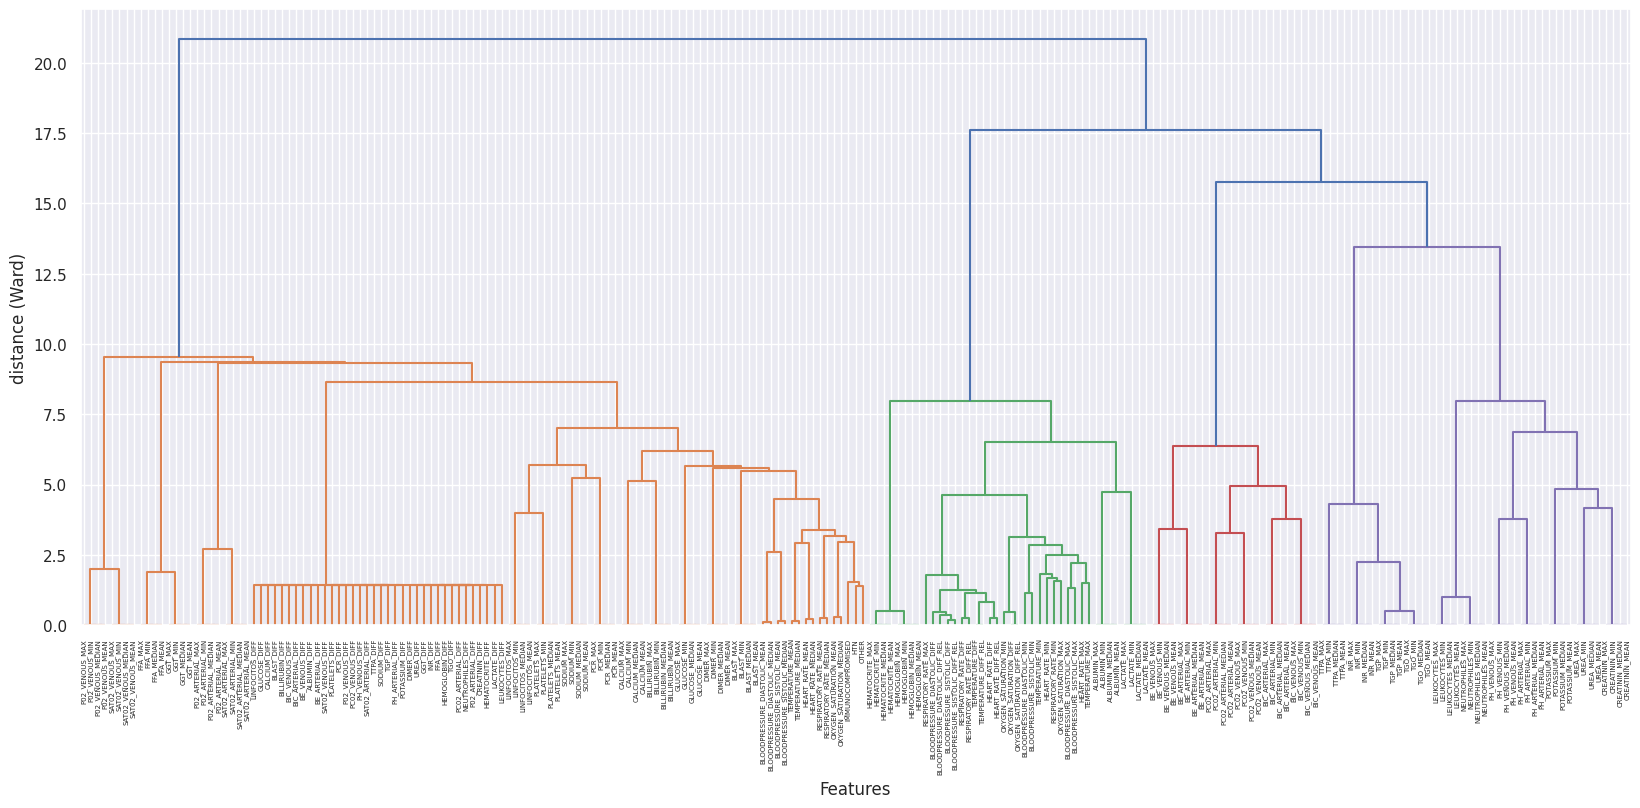

Selecting features bassed on the dendogram
Total number of features selected =  94


In [7]:
from data_preprocess import create_dendrogram, select_feature_with_linkage_matrix
corr, dist_linkage = create_dendrogram(df_covid_data[include_columns])
print("Selecting features bassed on the dendogram")
selected_features = select_feature_with_linkage_matrix(dist_linkage, 1, df_covid_data[include_columns])
not_selected = [x for x in include_columns if x not in selected_features]
df_covid_data = df_covid_data[[x for x in df_covid_data.columns if x not in not_selected]]

In [8]:
# Before any feature engineering/ NaN filling is applied we find the best applicable feature transform for each column and store it
best_transform_dict = find_best_normal_transform(df_covid_data)

Finding transform for :  PATIENT_VISIT_IDENTIFIER
Absolute log of slope =  0.12174339872102322 


Absolute log of slope =  379.5622784980143 


Absolute log of slope =  1.5103318418876992 


Absolute log of slope =  15.885687173089654 


Absolute log of slope =  3.2346308542883646 


The best transform is: log_transform, with absolute log of slope 0.12174339872102322





Finding transform for :  AGE_ABOVE65
Absolute log of slope =  1.2864569550340685 


Absolute log of slope =  0.37861917983948606 


Absolute log of slope =  0.9199440444524039 


Absolute log of slope =  19.803321801494008 


Absolute log of slope =  1.4754080128000377 


The best transform is: exp_transform, with absolute log of slope 0.37861917983948606





Finding transform for :  GENDER
Absolute log of slope =  1.3392673576904508 


Absolute log of slope =  0.4314295824958686 


Absolute log of slope =  0.9727544471087867 


Absolute log of slope =  19.750511398837624 


Absolute log of slope =  2.050925240789361

/data/datac/samanway/tabutils/feature_normal_transform.py:25: RuntimeWarning: invalid value encountered in log
  return abs(np.log(res[1][0]))
/data/datac/samanway/tabutils/feature_normal_transform.py:25: RuntimeWarning: divide by zero encountered in log
  return abs(np.log(res[1][0]))


Absolute log of slope =  1.7557530598582891 


The best transform is: yeojohnson_transform, with absolute log of slope 1.7557530598582891





Finding transform for :  GLUCOSE_DIFF
Absolute log of slope =  nan 


Absolute log of slope =  73.71604064763761 


Absolute log of slope =  nan 


Absolute log of slope =  inf 


Absolute log of slope =  74.40918782819756 


The best transform is: log_transform, with absolute log of slope nan





Finding transform for :  HEMATOCRITE_MEDIAN
Absolute log of slope =  2.014335786895596 


Absolute log of slope =  1.5991941473283555 


Absolute log of slope =  1.9725001062834189 


Absolute log of slope =  4.281634535640765 


Absolute log of slope =  0.9364870071112257 


The best transform is: yeojohnson_transform, with absolute log of slope 0.9364870071112257





Finding transform for :  HEMATOCRITE_DIFF
Absolute log of slope =  nan 


Absolute log of slope =  73.71604064763761 


Absolute log of slope =  nan 


Absolute log of slope =  inf 




**Masking**

Create a masking column to retain the information on the missingness pattern. Given a dataframe with selected columns masking feature would create a mask of 1 where values were present in original column and 0 if values are not present

In [9]:
demo_columns = ['AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER',
       'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
       'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6','WINDOW','ICU']
include_columns = [x for x in df_covid_data.columns if x not in exclude_columns]
# Masking 
## Input : df
## Output: Masked_df with same num of columns 
masked_df = masking(df_covid_data,include_columns)
masked_df.head(5)

,mask_HTN,mask_IMMUNOCOMPROMISED,mask_OTHER,mask_ALBUMIN_MEDIAN,mask_ALBUMIN_DIFF,mask_BE_ARTERIAL_MEDIAN,mask_BE_ARTERIAL_DIFF,mask_BE_VENOUS_MEDIAN,mask_BE_VENOUS_DIFF,mask_BIC_ARTERIAL_MEDIAN,...,mask_OXYGEN_SATURATION_MIN,mask_BLOODPRESSURE_DIASTOLIC_MAX,mask_BLOODPRESSURE_SISTOLIC_MAX,mask_HEART_RATE_MAX,mask_RESPIRATORY_RATE_MAX,mask_TEMPERATURE_MAX,mask_OXYGEN_SATURATION_MAX,mask_BLOODPRESSURE_DIASTOLIC_DIFF,mask_HEART_RATE_DIFF,mask_RESPIRATORY_RATE_DIFF
0,1,1,1,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


**Data Imputation**

Impute the data to fill in the missing values. Here we use linear interpolation, which calculates between the previous and next accessible value and substitutes the missing value, is similar to the previous/next value imputation but it is only applicable to numerical data

In [10]:
# Input : Df
# Output : Same DF , with changes in place
df_covid_data = linear_impute(df_covid_data, patient_ID)
df_covid_data.head(10)

/data/datac/samanway/tabutils/utils.py:31: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  return df_grouped.apply(


,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.210811,-0.109453,-0.333333,-0.014493,0.657895,-0.779710,-0.628499,-0.607843,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.037838,0.094527,-0.030303,-0.275362,0.736842,-0.559420,-0.256997,-0.215686,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.286486,0.298507,0.272727,0.362319,0.947368,-0.339130,0.114504,0.176471,ABOVE_12,1
5,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.329730,-0.059701,0.636364,-0.275362,1.000000,-1.000000,-1.000000,-1.000000,0-2,1
6,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.329730,-0.388060,-0.454545,-0.275362,0.894737,-1.000000,-1.000000,-1.000000,2-4,1
7,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.124324,-0.492537,-0.515152,-0.217391,1.000000,-1.000000,-1.000000,-1.000000,4-6,1
8,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.167568,-0.477612,-0.090909,-0.014493,1.000000,-0.913043,-0.923664,-0.764706,6-12,1
9,1,1,90th,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.556757,0.298507,0.757576,0.710145,1.000000,0.513043,0.114504,0.764706,ABOVE_12,1


# Feature Engineering



## Lag Features

***Delta Features : The difference between current datapoint and nth datapoint***

Inputs -> Data Frame, features_names to be excluded, window(int)

Output -> DF with delta feature

In [11]:
demo_columns = ['AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER',
       'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
       'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6','WINDOW','ICU']
df_delta = delta(df_covid_data, patient_ID, demo_columns,  window=1)
df_delta.head(3)

,Delta_1HTN,Delta_1IMMUNOCOMPROMISED,Delta_1OTHER,Delta_1ALBUMIN_MEDIAN,Delta_1ALBUMIN_DIFF,Delta_1BE_ARTERIAL_MEDIAN,Delta_1BE_ARTERIAL_DIFF,Delta_1BE_VENOUS_MEDIAN,Delta_1BE_VENOUS_DIFF,Delta_1BIC_ARTERIAL_MEDIAN,...,Delta_1OXYGEN_SATURATION_MIN,Delta_1BLOODPRESSURE_DIASTOLIC_MAX,Delta_1BLOODPRESSURE_SISTOLIC_MAX,Delta_1HEART_RATE_MAX,Delta_1RESPIRATORY_RATE_MAX,Delta_1TEMPERATURE_MAX,Delta_1OXYGEN_SATURATION_MAX,Delta_1BLOODPRESSURE_DIASTOLIC_DIFF,Delta_1HEART_RATE_DIFF,Delta_1RESPIRATORY_RATE_DIFF
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.060606,0.17094,0.000000,0.119403,0.00000,0.666667,-0.157895,0.00000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030303,0.00000,0.248649,0.203980,0.30303,-0.260870,0.078947,0.22029,0.371501,0.392157


## Time series Features

***Stats feature : Given a window find stats like min, max median, variance, energy and slope***

Inputs -> Data Frame, stats feature list, features on which stats needs to be calculated, window(int)

Output -> DF with stats feature

In [12]:
stats = ["var","energy","min","max"]
df_stats = statistics(df_covid_data, stats, include_columns, patient_ID, window=2).reset_index(drop=True)
df_slope = get_slope_stats(df_covid_data, include_columns, patient_ID, window_size=3).reset_index(drop=True)

/data/datac/samanway/mnf/lib/python3.10/site-packages/pandas/core/window/numba_.py:70: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.readthedocs.io/en/stable/user/parallel.html#diagnostics for help.

File "../mnf/lib/python3.10/site-packages/pandas/core/util/numba_.py", line 107:

            def impl(data, *_args):
            ^

  result[i] = numba_func(window, *args)
/data/datac/samanway/mnf/lib/python3.10/site-packages/pandas/core/window/numba_.py:70: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.readthedocs.io/en/stable/user/parallel.html#diagnostics for help.

File "../mnf/lib/python3.10/site-packages/pandas/core/util/numba_.py", line 107:

            def imp

***Sliding window feature : Given a window find stats like min, max median, variance, energy and slope***

Inputs -> Data Frame,features on which stats needs to be calculated, window(int)

Output -> DF with sliding window

In [13]:
from utils import sliding_window
window_length = 2
df_subset = df_covid_data[include_columns + [patient_ID]]
df = sliding_window(df_subset, len(df_subset), patient_ID, window_length)
df_covid_data = pd.concat([df_covid_data[patient_ID], df, df_covid_data.drop(columns=df_subset)],axis=1)

## Domain Specific Features

In [14]:
SBP = "BLOODPRESSURE_SISTOLIC_MAX-0"
Temp = "TEMPERATURE_MEAN-0"
HR = "HEART_RATE_MEAN-0"
Resp = "RESPIRATORY_RATE_MEAN-0"
df_covid_data = qSOFA(df_covid_data,SBP,Resp)
df_covid_data = MEWS(df_covid_data,Resp,HR,Temp,SBP)

In [15]:
# Concat all features together 
df_final = pd.concat([df_covid_data,masked_df,df_stats,df_delta,df_slope])

In [16]:
# Apply the feature tranform we found earlier at the end
apply_best_normal_transform(df_final, best_transform_dict = best_transform_dict)

,PATIENT_VISIT_IDENTIFIER,HTN-1,IMMUNOCOMPROMISED-1,OTHER-1,ALBUMIN_MEDIAN-1,ALBUMIN_DIFF-1,BE_ARTERIAL_MEDIAN-1,BE_ARTERIAL_DIFF-1,BE_VENOUS_MEDIAN-1,BE_VENOUS_DIFF-1,...,Slope_OXYGEN_SATURATION_MIN,Slope_BLOODPRESSURE_DIASTOLIC_MAX,Slope_BLOODPRESSURE_SISTOLIC_MAX,Slope_HEART_RATE_MAX,Slope_RESPIRATORY_RATE_MAX,Slope_TEMPERATURE_MAX,Slope_OXYGEN_SATURATION_MAX,Slope_BLOODPRESSURE_DIASTOLIC_DIFF,Slope_HEART_RATE_DIFF,Slope_RESPIRATORY_RATE_DIFF
0,1.000000e-16,0.0,0.0,1.0,0.605263,-1.0,-1.000000,-1.0,-1.000000,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.000000e-16,0.0,0.0,1.0,0.605263,-1.0,-1.000000,-1.0,-1.000000,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.000000e-16,0.0,0.0,1.0,0.605263,-1.0,-1.000000,-1.0,-1.000000,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.000000e-16,0.0,0.0,1.0,0.605263,-1.0,-1.000000,-1.0,-1.000000,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.000000e-16,0.0,0.0,1.0,0.302632,-1.0,-0.935829,-1.0,-0.931937,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.080808,0.051282,-0.064865,-0.134328,-0.060606,-0.318841,-0.210526,0.000000,0.000000,0.000000
1922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.010101,0.025641,0.021622,-0.089552,-0.030303,-0.159420,-0.026316,0.000000,0.000000,0.000000
1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.020202,0.042735,0.000000,-0.029851,-0.030303,0.057971,-0.052632,0.000000,0.000000,0.000000
